## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was to rescale, normalize, and turn any image into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

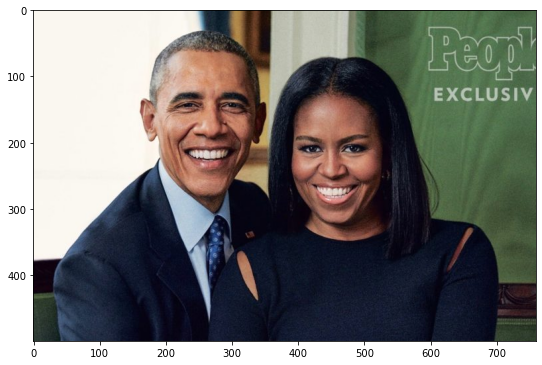

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


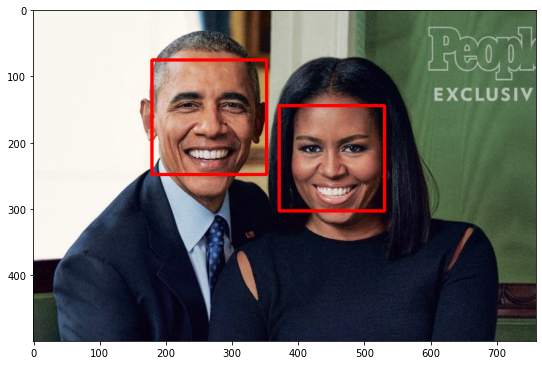

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [4]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('saved_models/keypoints_model_2.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (dropout3): Dropout(p=0.3, inplace=False)
  (dropout4): Dropout(p=0.4, inplace=False)
  (dropout5): Dropout(p=0.5, inplace=False)
  (dropout6): Dropout(p=0.6, inplace=False)
  (fc1): Linear(in_features=43264, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=136, bias=True)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




[[ -0.4796041   -4.823801  ]
 [ -1.0922285   -6.4296994 ]
 [ -0.99424833  -9.994955  ]
 [ -3.280106   -12.13164   ]
 [ -3.730637   -15.026128  ]
 [ -4.1829267  -16.20509   ]
 [ -4.7026653  -18.055056  ]
 [ -5.33747    -18.287497  ]
 [ -7.9002576  -17.22367   ]
 [ -9.90714    -15.078993  ]
 [-11.2551155  -14.278517  ]
 [-13.489378   -15.494561  ]
 [-15.141198   -13.37812   ]
 [-15.485371   -11.951552  ]
 [-16.269957    -9.254261  ]
 [-17.713146    -7.478935  ]
 [-15.083145    -5.630677  ]
 [ -0.53544813  -5.5016084 ]
 [  1.6709816   -1.159471  ]
 [  0.03047986  -3.6145055 ]
 [ -2.1885676   -2.819058  ]
 [ -2.5381975   -0.7760742 ]
 [ -6.9010406   -1.5912513 ]
 [ -5.571653    -0.5111314 ]
 [ -9.684171    -1.5789573 ]
 [ -8.691632    -1.3034251 ]
 [-10.823229    -2.7796736 ]
 [ -5.16427     -4.193465  ]
 [ -3.0235505   -6.003068  ]
 [ -3.277393    -5.7771816 ]
 [ -3.432173    -8.080852  ]
 [ -4.5889254   -7.944349  ]
 [ -4.409161   -10.227447  ]
 [ -5.0322247   -8.796304  ]
 [ -6.8219123 

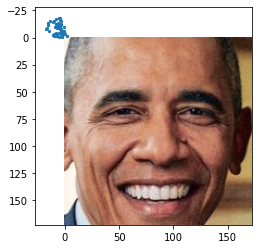

[[ 14.86965     -6.426712  ]
 [ 13.353397    -9.864179  ]
 [ 12.377165   -15.205152  ]
 [  9.53985    -17.230356  ]
 [  7.9743996  -21.26981   ]
 [  6.0688     -23.562227  ]
 [  3.2723618  -25.280672  ]
 [  0.82634914 -26.71432   ]
 [ -3.804775   -26.301949  ]
 [ -6.9391017  -24.728996  ]
 [ -6.833665   -20.763193  ]
 [ -8.83098    -21.485327  ]
 [-10.724856   -18.873579  ]
 [-10.530986   -15.901419  ]
 [-11.965028   -11.504719  ]
 [-12.129462    -9.566065  ]
 [ -9.293743    -6.7264676 ]
 [  8.726239    -5.072467  ]
 [  9.658003    -1.1718364 ]
 [  6.8463483   -2.4428988 ]
 [  2.4025002   -1.2582743 ]
 [  1.728686     0.66573805]
 [ -4.108946     0.32489973]
 [ -3.7636695    1.2328944 ]
 [ -7.9062905    0.8452155 ]
 [ -6.570844     0.4187991 ]
 [ -7.575946    -2.3726022 ]
 [ -1.9413714   -3.703858  ]
 [ -1.1683348   -7.0313225 ]
 [ -1.8024697   -7.9766984 ]
 [ -2.2815669  -10.886361  ]
 [ -1.1497492  -11.508874  ]
 [ -1.2751298  -13.788262  ]
 [ -3.1062932  -11.794944  ]
 [ -4.7397504 

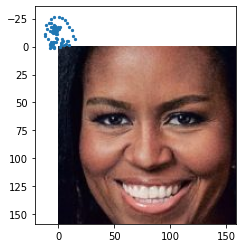

In [15]:
image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    
    ## TODO: Convert the face region from RGB to grayscale
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    norm_roi = gray_roi/255.0
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    new_shape = (224,224)
    scale_roi = cv2.resize(norm_roi, new_shape)
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    scale_roi = scale_roi.reshape(scale_roi.shape[0], scale_roi.shape[1], 1)
    scale_roi = scale_roi.transpose((2, 0, 1))
    
    # numpy to tensor
    x = torch.from_numpy(scale_roi)
    # shape (B x C x H x W) (batch, channel, height, width)
    x = x.unsqueeze(1)
    x = x.type(torch.FloatTensor)
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
    prediction = net(x)


    prediction = prediction.view(prediction.size()[0], 68, -1)
    
    prediction = prediction.reshape((-1, 2))    
    prediction = prediction.detach().numpy()
    # undo normalization of keypoints  
#     prediction = prediction*50.0+100 # ???
    
    print(prediction)
    

    ## TODO: Display each detected face and the corresponding keypoints    
    img = roi
    plt.imshow(img)
    plt.scatter(prediction[:,0], prediction[:,1], s=20, marker='.')
    plt.show()
